# Graphical Exploratory Data Analysis

In [1]:
import pandas as pd

df_swing = pd.read_csv('2008_swing_states.csv')
df_swing[['state', 'county', 'dem_share']]


,state,county,dem_share
0,PA,Erie County,60.08
1,PA,Bradford County,40.64
2,PA,Tioga County,36.07
3,PA,McKean County,41.21
4,PA,Potter County,31.04
...,...,...,...
217,OH,Hamilton County,53.53
218,OH,Highland County,36.54
219,OH,Hocking County,49.58
220,OH,Licking County,41.97


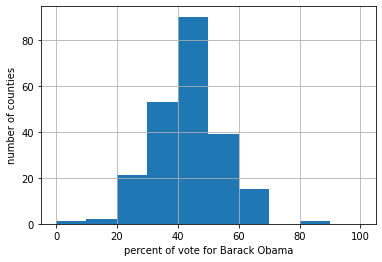

In [9]:
import matplotlib.pyplot as plt
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
_ = plt.hist(df_swing['dem_share'], bins=bin_edges)
_ = plt.xlabel('percent of vote for Barack Obama')
_ = plt.ylabel('number of counties')
_ = plt.grid(True)
plt.show() 

In these courses: 

You can use DataFrames and numpy arrays interchangeably.

Always label the axes!

222


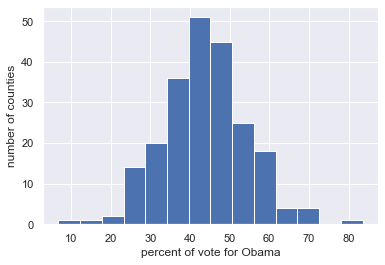

In [20]:
import seaborn as sns
import numpy as np
sns.set() # sets the default seaborn style

print(len(df_swing['dem_share']))
# Square root rule
n_data = len(df_swing['dem_share'])
n_bins = int(np.sqrt(n_data))

_ = plt.hist(df_swing['dem_share'], bins=n_bins)
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')
plt.show()

The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples.

**Binning bias**: you might interpret plot differently for different choices of bins.

Therefore: use bee swarm plot.

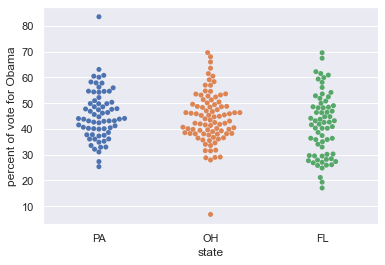

In [21]:
_ = sns.swarmplot(x='state', y='dem_share', data=df_swing)
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for Obama')
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
C:\Users\oleksiysyrotkin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


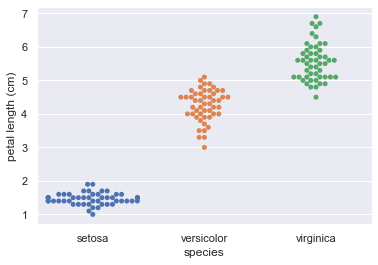

In [39]:
# Create bee swarm plot with Seaborn's default settings
# This assumes df contains the entire iris data frame
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

print(iris.target)
print(iris.target_names)
df['species'] = iris.target
df['species'] = df['species'].apply(lambda row: iris.target_names[row])
df
sns.set()
_ = sns.swarmplot(x='species', y='petal length (cm)', data=df)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()



ECDF: **empricial cumulative distribution function** - alternative to bee swarm plot, not to obfuscate the data

ECDF plots **all** the data

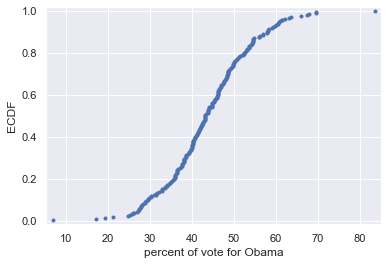

In [47]:
import numpy as np
x = np.sort(df_swing['dem_share'])
#print(x)
y = np.arange(1, len(x) + 1) / len(x)
#print(y)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('ECDF')
plt.margins(0.02) # Keeps data off plot edges - 2% buffer around the plot
plt.show()

In [14]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

In [13]:

versicolor_data = df[df['species'] == 'versicolor']
versicolor_petal_length= versicolor_data["petal length (cm)"]
versicolor_petal_length
x_vers, y_vers = ecdf(versicolor_petal_length)


_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.xlabel('versicolor petal length (cm)')
_ = plt.ylabel('ECDF')
plt.show()

NameError: name 'df' is not defined

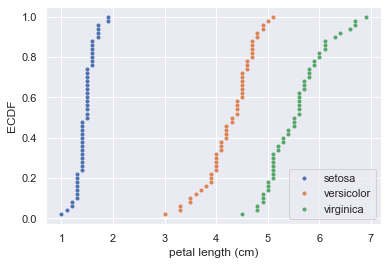

In [79]:
# plotting all on the same plot:
setosa_data = df[df['species'] == 'setosa']
setosa_petal_length= setosa_data["petal length (cm)"]
x_set, y_set = ecdf(setosa_petal_length)
_ = plt.plot(x_set, y_set, marker='.', linestyle='none')

versicolor_data = df[df['species'] == 'versicolor']
versicolor_petal_length= versicolor_data["petal length (cm)"]
x_vers, y_vers = ecdf(versicolor_petal_length)
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')

virginica_data = df[df['species'] == 'virginica']
virginica_petal_length= virginica_data["petal length (cm)"]
x_virg, y_virg = ecdf(virginica_petal_length)
_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')

plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

plt.show()

# Quantitative Exploratory Data Analysis

In [11]:
# Mean:
import numpy as np

dem_share_PA = df_swing[df_swing["state"] == "PA"]["dem_share"]
dem_share_PA
np.mean(dem_share_PA)

45.476417910447765

### Mean

$\overline{x}$ = $\frac{1}{n}\sum_{i=1}^{n} x_i$

Influenced by outliers.

### Median
- sort data
- choose data in the middle

immune to outliers (because defined by ranking, not by values)


In [24]:
import numpy as np

dem_share_PA = df_swing[df_swing["state"] == "PA"]["dem_share"]
dem_share_PA

np.median(dem_share_PA)

44.03

In [55]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df
iris.target_names
iris.target

# 1: One way of doing it: first create a column, then apply lambda to column
df["species"] = iris.target
df["species"] = df["species"].apply(lambda row: iris.target_names[row])
type(df["species"]) # pandas.core.series.Series => can apply "apply"
type(iris.target) # numpy.ndarray => cannot apply "apply"

# 2: Another way of doing it: define lambda separately
# You need either 1 or 2, not both.
substitute_species_name = lambda index: iris.target_names[index]
df["species"] = substitute_species_name(iris.target)
df

versicolor_petal_length = df[df["species"] == "versicolor"]["petal length (cm)"]
np.mean(versicolor_petal_length)


4.26

Nth percentile is a data point that is greater than N% of the data.

Median == 50th percentile


In [58]:
np.percentile(df_swing["dem_share"], [25, 50, 75])

array([37.3025, 43.185 , 49.925 ])

### Box plots
IQR - inter-quartile range - the data within the "box"

whiskers: 1.5IQR (1.5 is the empirical value, recommendation) or the extent of data, whichever more extreme

From Fabian: 1.5 or there, where the last (first) data point is.

Fabian: 
- make both a box plot and histogram
- first a box plot

outliers: points outside of whiskers

No common definition of outliers.

Good alternative to **bee swarm plots** when data too cluttered.


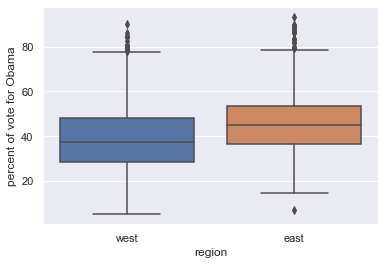

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
df_all_states = pd.read_csv('2008_all_states.csv')
_ = sns.boxplot(x = 'east_west', y='dem_share', data=df_all_states)
_ = plt.xlabel('region')
_ = plt.ylabel('percent of vote for Obama')
plt.show()


[3.3    4.     4.35   4.6    4.9775]


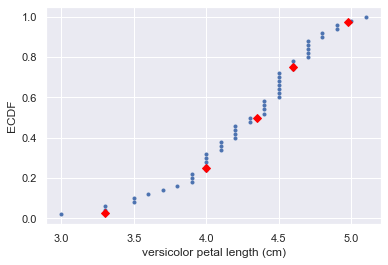

In [70]:
percentiles = np.array([2.5, 25, 50, 75, 97.5])
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)
print(ptiles_vers)

def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

versicolor_data = df[df['species'] == 'versicolor']
versicolor_petal_length= versicolor_data["petal length (cm)"]
versicolor_petal_length
x_vers, y_vers = ecdf(versicolor_petal_length)

_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.xlabel('versicolor petal length (cm)')
_ = plt.ylabel('ECDF')

_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red', linestyle='none')

plt.show()


## Box Plot of iris petal length:

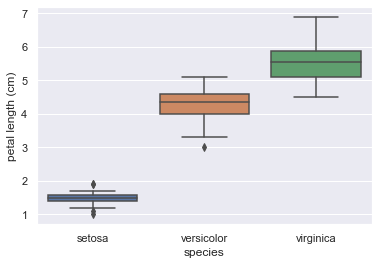

In [77]:
_ = sns.boxplot(x='species', y='petal length (cm)', data=df)
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')
plt.show()

## Spread (Variance, standard deviation) of percent of vote for Obama in FL counties:

In [95]:
dem_share_FL = df_swing[df_swing["state"] == "FL"]["dem_share"]
dem_share_FL

np.var(dem_share_FL)

np.std(dem_share_FL)

12.142602117687158

In [94]:
# Calculate variance explicitly:
# As the mean of squared distances from the mean
mean = np.mean(versicolor_petal_length)

differences = [x - mean for x in versicolor_petal_length]
diff_sq = [x**2 for x in differences]
variance_explicit = np.mean(diff_sq)
print(variance_explicit)

0.21640000000000004


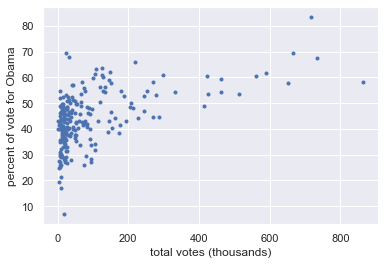

In [99]:
total_votes = df_swing["total_votes"]
_ = plt.plot(total_votes/1000, dem_share, marker='.', linestyle='none')
_ = plt.xlabel('total votes (thousands)')
_ = plt.ylabel('percent of vote for Obama')

The scatter plot above gives us more insight: although more counties voted against Obama, the most populous counties voted for Obama

Covariance - shows how one variable varies with the change of the other variable.

$covariance$ = $\frac{1}{n}\sum_{i=1}^{n}{(x_i - \overline{x})(y_i - \overline{y})}$

Positive covariance => positively correlated (both x and y are greater than their respective means)

$\rho$ = Pearson correlation = $\frac{covariance}{(std.dev.  of  x)(std.dev.  of  y)}$

= (variability due to codependence)/(independent variability)

Varies from `[-1...1]`

0 -> no correlation at all

Person correlation is dimensionless; covariance divided by both standard deviations.

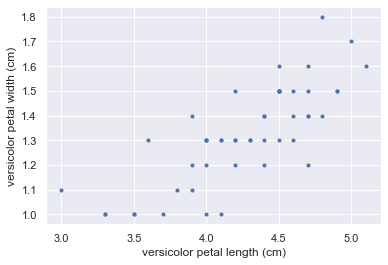

In [104]:
# Plot two properties of a single species, to find out if they are positively correlated

versicolor_petal_width = df[df["species"] == 'versicolor']['petal width (cm)']
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')
_ = plt.xlabel('versicolor petal length (cm)')
_ = plt.ylabel('versicolor petal width (cm)')
plt.show()

### Covariance matrix:
`[0, 0]` is variance of x

`[1, 1]` is variance of y

`[0, 1]` and `[1, 0]` are the covariance values of x vs. y


In [105]:

# Covariance matrix
np.cov(versicolor_petal_length, versicolor_petal_width)


array([[0.22081633, 0.07310204],
       [0.07310204, 0.03910612]])

In [109]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0,1]

correlation = pearson_r(versicolor_petal_length, versicolor_petal_width)
print(correlation) # positively correlated

0.7866680885228169


# Probability: Discrete variables

**Statistical inference** is about describing what you might expect iif the data were acquired again, again, again.

In [120]:
# Bernouilli Trials

seed = np.random.seed(42)
random_numbers = np.random.random(size = 4)
random_numbers

heads = random_numbers < 0.5
heads

# python treats True as 1 in numerical contexts
np.sum(heads)

1

In [131]:
# probability of getting 4 heads if we repeat the argument over and over
seed = np.random.seed(42)
total = 10000
count_4_heads = 0.0
for i in range(total):
    random_numbers = np.random.random(size = 4)
    heads = random_numbers < 0.5
    if (np.sum(heads) == 4):
        count_4_heads += 1
print(count_4_heads / total)


0.0618


## Hacker statistics
- determine how to simulate data
- simulate many, many times
- compute the fraction of trials that have the outcome you are interested in

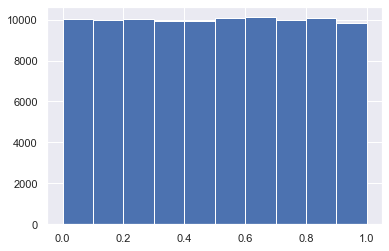

In [135]:
# Check how random the random number generator is
# We expect a more or less uniform distribution
np.random.seed(42)

total = 100000
random_numbers = np.random.random(size=total) 

# Alternatively, could loop and add each number in a loop, but it is less efficient
#random_numbers =np.empty(total)
# for i in range(total):
#     random_numbers[i] = np.random.random()

_ = plt.hist(random_numbers)
plt.show()


In [137]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    n_success = 0

    # Perform trials
    for i in range(n):
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

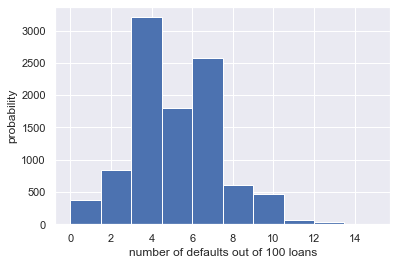

In [141]:
# Estimating the number of defaults per 100 loans where a probability of a single default is 0.05
# It is a Bernoulli trial
np.random.seed(42)

total = 1000
n_defaults = np.empty(total)

for i in range(total):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

# normed=True means the height of the bars will represent probability
# My version of matplotlib does not have `normed` parameter
_ = plt.hist(n_defaults)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

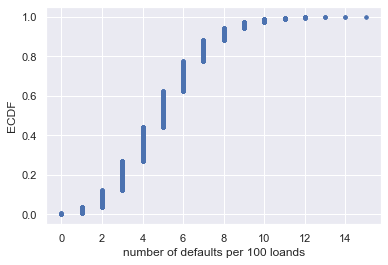

Probability of losing money = 0.0263


In [143]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the ECDF
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('number of defaults per 100 loands')
_ = plt.ylabel('ECDF')

plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults
n_lose_money = np.sum(n_defaults >= 10)

print('Probability of losing money =', n_lose_money / len(n_defaults))

PMF - **Probability mass function** - set of probablitlities of discrete outcomes.

e.g. Throwing a die - discrete uniform PMF

The number r of successes in **n Bernoulli trials** with probability p of success is **binomially** distributed.



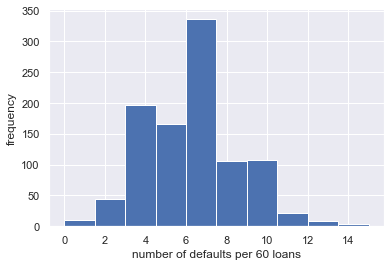

In [153]:
samples = np.random.binomial(60, 0.1, size=1000)
n = 60
p = 0.1
_ = plt.hist(samples)
_ = plt.xlabel('number of defaults per 60 loans')
_ = plt.ylabel('frequency')
plt.show()

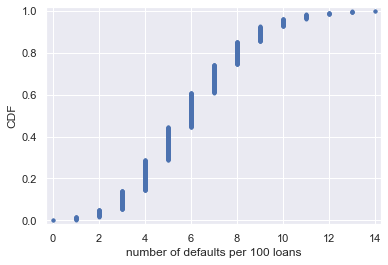

In [152]:
x, y = ecdf(samples)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('number of defaults per 60 loans')
_ = plt.ylabel('CDF')
plt.show()

Poisson process - timing of next event completely independent of when the previous event happened.
- natural births in a given hospital
- hits on a website during a given hour
- aviation incidents

(average) Number of arrivals in a given amount of time - Poisson distributed

Poisson distribution - limit of Binomial distribution for low probability of success and large number of trials (i.e., for rare events)

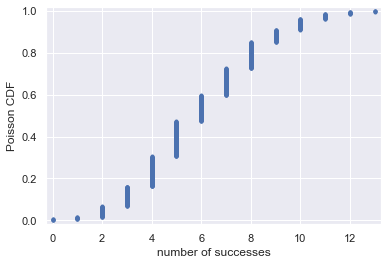

In [156]:
samples = np.random.poisson(6, size=1000)
x, y = ecdf(samples)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('number of successes')
_ = plt.ylabel('Poisson CDF')
plt.show()

In [157]:
# Comparing Poisson distribution with Binomial distribution:
# They should be close
# Poisson is easier to work with because only 1 parameter instead of 2
samples_poisson = np.random.poisson(10, size=10000)
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]


# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

Poisson:      9.949 3.188949513554581
n = 20 Binom: 10.0277 2.241903813726182
n = 100 Binom: 10.0088 2.995149839323569
n = 1000 Binom: 9.9854 3.136428994892121


In [ ]:
# Probability of >= 7 No-hitters in one baseball season

# Draw 10,000 samples out of Poisson distribution: n_nohitters
# The Poisson parameter (average) is 251/115 because there were 251 no-hitters in 115 years.
# So, on average, there were 251/115 no-hitters in a season
n_nohitters = np.random.poisson(251/115, size=10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large / len(n_nohitters)

print('Probability of seven or more no-hitters:', p_large)


# Probability: continuous variables

PDF - **probability density function** - describes chance of observing a value of a continuous variable.

Area under Normal curve - probability of event ( variable > X)

CDF - **cumulative distribution function**

## Normal distribution:

Parameters:
- mean
- std. dev

Comparing histogram to PDF - could have binning bias (depends on how you bin)

=> Better to compare ECDF to theoretical CDF of Normal distribution.

For theoretical CDF: use `np.random.normal`



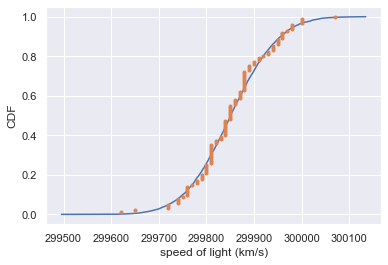

In [23]:
# Comparing ECDF (empirical cumulative distribution function) 
# to theoretical CDF (cumulative distribution function)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_michelson_speed_of_light = pd.read_csv('michelson_speed_of_light.csv')
michelson_speed_of_light = df_michelson_speed_of_light['velocity of light in air (km/s)']
michelson_speed_of_light
mean = np.mean(michelson_speed_of_light)
std = np.std(michelson_speed_of_light)

samples = np.random.normal(mean, std, size=10000)
x, y = ecdf(michelson_speed_of_light)

x_theor, y_theor = ecdf(samples)

sns.set()
# we probably expect the theoretical CDF to be really smooth (and it is!) => so, no 'marker'
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('speed of light (km/s)')
_ = plt.ylabel('CDF')
plt.show()


From the plot above we can deduce that the observed data are **approximately normally distributed**.

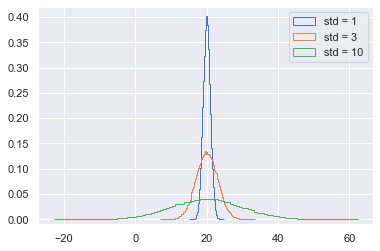

In [27]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
size = 100000
mean = 20
samples_std1 = np.random.normal(mean, 1, size=size)
samples_std3 = np.random.normal(mean, 3, size=size)
samples_std10 = np.random.normal(mean, 10, size=size)

# Make histograms
_ = plt.hist(samples_std1, bins=100, density=True, histtype='step')
_ = plt.hist(samples_std3, bins=100, density=True, histtype='step')
_ = plt.hist(samples_std10, bins=100, density=True, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


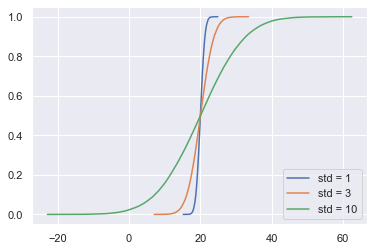

In [30]:
# Generating and plotting the theoretical CDFs

# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
_ = plt.plot(x_std1, y_std1)
_ = plt.plot(x_std3, y_std3)
_ = plt.plot(x_std10, y_std10)

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


The CDFs all pass through the mean at the 50th percentile; the mean and median of a Normal distribution are equal. The width of the CDF varies with the standard deviation.

Normal: probablity of > 4 stdev from mean is very small

In [6]:
import pandas as pd
import numpy as np

belmont = pd.read_csv('belmont.csv')
belmont_no_outliers = belmont
# df[df["species"] == "versicolor"]["petal length (cm)"]
belmont_no_outliers

# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers['Time'])
mu
sigma = np.std(belmont_no_outliers)


# # Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)


# # Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)


# # Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [15]:
b1 = belmont_no_outliers[belmont_no_outliers['Year'] != 1970]
belmont_no_outliers = b1[b1['Year'] != 1973]
belmont_no_outliers

# TODO: we need to convert Time to seconds
#belmont_no_outliers['Time']

,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,2:28.51,Belmont,1.5
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",2:26.65,Belmont,1.5
2,2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,2:28.52,Belmont,1.5
3,2013,Palace Malice,Mike Smith,Todd Pletcher,Dogwood Stable,2:30.70,Belmont,1.5
4,2012,Union Rags,John Velazquez,Michael Matz,Phyllis M. Wyeth,2:30.42,Belmont,1.5
...,...,...,...,...,...,...,...,...
86,1930,Gallant Fox,Earl Sande,Jim Fitzsimmons,Belair Stud,2:31.60,Belmont,1.5
87,1929,Blue Larkspur,Mack Garner,Herbert J. Thompson,Edward R. Bradley,2:32.80,Belmont,1.5
88,1928,Vito,Clarence Kummer,Max Hirsch,Alfred H. Cosden,2:33.20,Belmont,1.5
89,1927,Chance Shot,Earl Sande,Pete Coyne,Joseph E. Widener,2:32.40,Belmont,1.5


In [ ]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
#prob = samples
samples_less_than = [x for x in samples if x <= 144]
#print(samples_less_than)

prob = len(samples_less_than) / len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)



Exponential distribution - waiting time between arrivals of a Poisson process

In [ ]:
# TODO: need inter_times - series of times between nuclear power incidents
mean = np.mean(inter_times)
samples = np.random.exponential(mean, size=10000)
x, y = ecdf(inter_times)

x_theor, y_theor = ecdf(samples)

_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('time (days)')
_ = plt.ylabel('CDF')

In [17]:
# waiting times to se
# no hitter
# and then see a cycle
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size=size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size=size)

    return t1 + t2

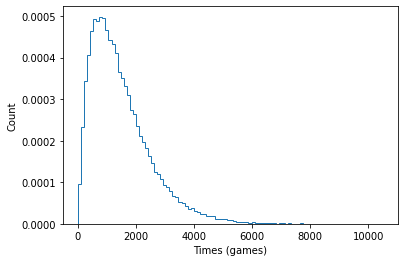

In [20]:
import matplotlib.pyplot as plt

# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764, 715, size=100000)

# Make the histogram
_ = plt.hist(waiting_times, bins=100, density=True, histtype='step')



# Label axes
_ = plt.xlabel('Times (games)')
_ = plt.ylabel('Count')



# Show the plot
plt.show()

## Notes:

`quickda` Python library for EDA

`df.describe` - useful function

